# Preprocesado e ingeniería de características

## Discretizado basado en árboles de decisión

El discretizado es una técnica de preprocesado de datos que permite reemplazar una característica continua por otra discreta mediante la agrupación de valores. Hemos visto que esta técnica se puede complementar con una codificación one-hot para eliminar la dependencia lineal entre los grupos obtenidos. 

*Scikit-learn* incluye varias estrategias distintas de discretizado en la clase *KBinDiscretizer* que se puede utilizar para especificar transformaciones en caracteristicas mediante una instancia de la clase *ColumnTransformer*.

En el artículo [1] se describe el uso de árboles de decisión para realizar discretizado. El método consiste en, dada una característica, entrenar un árbol de decisión de profundidad limitada (2, 3 o 4) usando únicamente dicha característica. Los vectores de probabilidad de clasificación que se obtienen con este árbol son utilizados para recodificar la característica inicial. La clave reside en que los posibles vectores de probabilidades de clasificación (es decir, los valores de *predict_proba*) obtenidos por un árbol de decisión son un conjunto finito muy reducido (usualmente igual al número de clasificaciones posibles). El método podría ser el siguiente: 

En la fase de entrenamiento, dados un conjunto de datos $X$, sus valores de clasificación $y$ y una característica $v$

* Se genera un árbol de decisión $T$ para el conjunto de datos formado únicamente por los valores de la característica $v$ del conjunto de datos original $X$, con valores de clasificación $y$. Este árbol de decisión puede ser la mejor opción posible cuando se consideran distintos valores de profundidad limitada (2, 3 o 4).
* Se obtienen todos los posibles vectores de probabilidades de clasificación del árbol de decisión $T$ para todos los datos de la característica $v$ en $X$. Hay una cantidad finita de estos vectores de clasificación, a los que asociamos un valor numérico único. Por ejemplo, los vectores de probabilidad de clasificación podrían ser $[0,0.5,0.5]$, $[0.3,0.2,0.5]$ y $[0.8,0.1,0.1]$, a los que podríamos asociar los valores $0$, $1$ y $2$, respectivamente.

En la fase de transformación, dados un conjunto de datos $X'$ (posiblemente distinto al utilizado durante el entrenamiento) y una característica $v$

* Para cada dato $e$ en $X'$, se considera el valor de la característica $v$ y se pasa al árbol de decisión $T$ obtenido durante la fase de entrenamiento. Para este valor se obtiene el vector de probabilidades de clasificación, $w$.
* Se reemplaza el valor de la característica $v$ en $e$ por el valor numérico asociado al vector de probabilidades de clasificación $w$. Siguiendo el ejemplo anterior, si el vector de probabilidades de clasificación es $[0.3,0.2,0.5]$ entonces se reemplazará el valor de la característica $v$ por $1$.

[1] Niculescu-Mizil, A., Perlich, C., Swirszcz, G., Sindhwani, V., Liu, Y., Melville, P., Wang, D., Xiao, J., Hu, J., Singh, M., Xiong Shang, W., Feng Zhu, Y.. Winning the KDD Cup Orange Challenge with Ensemble Selection in Proceedings of KDD-Cup 2009 Competition, PMLR 7:23-34, 2009.
https://dl--acm--org.us.debiblio.com/doi/10.5555/3000364.3000366

## Contenido del ejercicio

El ejercicio consiste en:

* Investigar el uso de las distintas estrategias de discretizado que incluye *scikit-learn*, explicando claramente en qué consiste cada una de ellas y cómo se utilizan.
* Definir la función `decisionTreeDiscretizerFit(X_data,y_data,variables)` que, dado un conjunto de datos y sus valores de clasificación, `X_data` e `y_data`, y una lista de índices de características, `variables`, devuelve un diccionario que asocia a cada índice de característica en `variables` un par `(treeModel,encoding)` en el que `treeModel` es un árbol de decisión entrenado únicamente con dicha característica del conjunto de datos `X_data` con valores de clasificación `y_data`, y `encoding` es una asociación entre los distintos vectores de probabilidades de clasificación (*predict_proba*) que se obtienen con dicho árbol en el conjunto de datos y valores numéricos únicos.
* Definir la función `decisionTreeDiscretizerTransform(X_data,variables,dtDiscretizer)` que, dado un conjunto de datos, `X_data`, una lista de índices de características, `variables`, y un diccionario `dtDiscretizer` obtenido por la función `decisionTreeDiscretizerFit` (no necesariamente para el mismo conjunto de datos `X_data` ni la misma lista de variables `variables`), genera un conjunto de datos nuevo (i.e. no modifica el conjunto de datos de entrada) igual a `X_data` en el que los valores de las características cuyos índices se indican en `variables` son reemplazados por los valores numéricos asociados a los vectores de probabilidades de clasificación, obtenidos con los correspondientes árboles de decisión asociados a cada característica en `dtDiscretizer`.
* Evaluar y comparar las distintas estrategias de discretizado que incluye *scikit-learn* y la estrategia propuesta de discretizado basado en árboles de decisión sobre el conjunto de datos *Iris*, para discretizar algunas de sus características. Para esto se propone dividir el conjunto de datos en dos, `X_train` y `X_test`, entrenar los discretizadores con `X_train` y transformar tanto `X_train` como `X_test`, finalmente evaluar el rendimiento de un modelo lineal (por ejemplo *LogisticRegression*) tanto con descretizado como sin discretizado.

El **desarrollo tiene que estar razonado**, indicando en cada apartado qué se está haciendo, **demostrando así el conocimiento adquirido en este módulo**. ¿Qué conclusiones puedes sacar sobre el discretizado basado en árboles de decisión?

Investigar el uso de las distintas estrategias de discretizado que incluye *scikit-learn*, explicando claramente en qué consiste cada una de ellas y cómo se utilizan.

Para el discretizado Scikit-learn usa principalmente KBinsDiscretizer el cual se encuentra dentro del módulo preprocessing y que dependiendo de la estrategia para definir los limites nos encontramos :

###    * Uniforme:
Consiste: En agrupar en distintos intervalos(Bins) que sean del mismo ancho, es decir, si tenemos una característica que va de 0 a 100 y queremos discretizarla con 4 bins, los grupos serían 0-25,25-50,50-75,75-100. Esta se utiliza sobre todo si la distribución de los datos es uniforme.
        
Como se utiliza: Para implementarlo tendríamos que:


 **from sklearn.preprocessing import KBinsDiscretizer**

 **uniform = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')**

 **X= uniform.fit_transform(X)**
    
###    * Quantile/Frecuencia:
    
Consiste: Para este tipo lo que se busca es que cada grupo tenga el mismo número de datos,la idea  es usar cuartiles para definir los límites, ya que estos son los que los definen
        
Como se utiliza: Igual que el anterior pero especificando que vamos a usar cuartiles en el apartado de strategy

 **from sklearn.preprocessing import KBinsDiscretizer**

 **uniform = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')**

 **X= uniform.fit_transform(X)**
    
###    * kmeans:

Consiste: Como hemos visto en el tema 1, en este caso vamos a usar el algoritmo de las k_medias para agrupar los datos en k clusters y los límites estarán definidos por los centros de estos clusters
        
Como se utiliza: como los anteriores pero especificando que vamos a usar Kmeans en el apartado de strategy

  **from sklearn.preprocessing import KBinsDiscretizer**

 **uniform = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')**

 **X= uniform.fit_transform(X)**   
 
 
 
 
Los resultados de estas transformaciones sobre un conjunto de datos quedaría como el ejemplo
    
  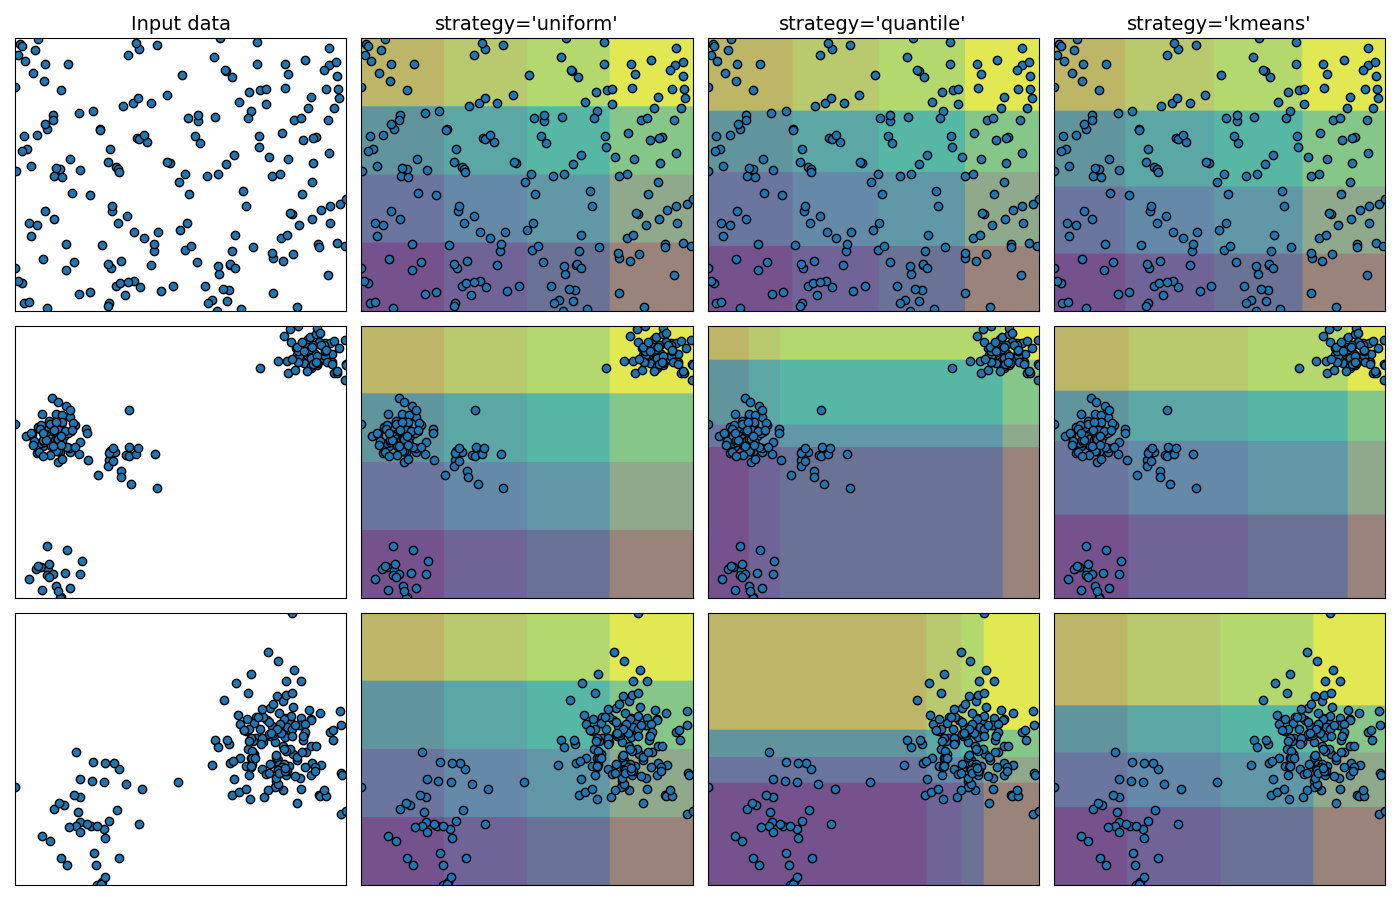

Definir la función `decisionTreeDiscretizerFit(X_data,y_data,variables)` que, dado un conjunto de datos y sus valores de clasificación, `X_data` e `y_data`, y una lista de índices de características, `variables`, devuelve un diccionario que asocia a cada índice de característica en `variables` un par `(treeModel,encoding)` en el que `treeModel` es un árbol de decisión entrenado únicamente con dicha característica del conjunto de datos `X_data` con valores de clasificación `y_data`, y `encoding` es una asociación entre los distintos vectores de probabilidades de clasificación (*predict_proba*) que se obtienen con dicho árbol en el conjunto de datos y valores numéricos únicos.

Para este primer apartado lo que vamos a hacer es devolver un diccionario para cada arbol entrenado para esa característica y el enconding correspondiente, para ello: 
 * 1º Nos definimos un diccionario donde guardar la solución
 * 2º Creamos un árbol de profundidad limitada y lo entrenamos para esa variable
 * 3º Devolvemos el diccionario con el arbol entrenado y el enconding

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer

def decisionTreeDiscretizerFit(X_data, y_data, variables):
    # Guardaremos aquí la solución
    dict_discr = {}
      
    for v in variables:
        # Como indica el enunciado, podríamos tener 2, 3, 4 niveles de profundidad en el árbol
        tree = DecisionTreeClassifier(max_depth=4)
        # Entrenamos el árbol para esa característica
        tree.fit(X_data[:, [v]], y_data)
        
        # Ahora debemos guardar en el dict el árbol y el predict_proba de este, así que tenemos que definirlo:
        
        # Primero calculamos las probs de la variable v
        probab = tree.predict_proba(X_data[:, [v]])
        
        # Asociamos valores numéricos a los vectores de probabilidad y los guardamos en el encoding
        encoding = {}
        for i, vec in enumerate(probab):
            encoding[tuple(vec)] = i

        # Añadimos al arbol el arbol y el enconding al diccionario
        dict_discr[v] = (tree, encoding)

    return dict_discr

Definir la función `decisionTreeDiscretizerTransform(X_data,variables,dtDiscretizer)` que, dado un conjunto de datos, `X_data`, una lista de índices de características, `variables`, y un diccionario `dtDiscretizer` obtenido por la función `decisionTreeDiscretizerFit` (no necesariamente para el mismo conjunto de datos `X_data` ni la misma lista de variables `variables`), genera un conjunto de datos nuevo (i.e. no modifica el conjunto de datos de entrada) igual a `X_data` en el que los valores de las características cuyos índices se indican en `variables` son reemplazados por los valores numéricos asociados a los vectores de probabilidades de clasificación, obtenidos con los correspondientes árboles de decisión asociados a cada característica en `dtDiscretizer`.

In [7]:
# Ahora con este método vamos a transformar el conjunto y luego comprobaremos como se comporta y el rendimiento de este nuevo conjunto
def decisionTreeDiscretizerTransform(X_data, variables, dt_discretizer):
    
    # Debemos dejar el conjunto original sin tocar así que crearemos una copia
    X_copy = X_data.copy()
    
    #Los indices de las características son reemplazador por los valores asociaciones a los vectores de probabilidad
    for v in variables:
        # EL dt_disc lo obtenemos del ejercicio anterior y extraemos de estos el arbol junto al enconding correspondiente
        tree, encoding = dt_discretizer[v]
        proba_vectors = tree.predict_proba(X_copy[:, [v]])
          
        # Asociamos valores numéricos únicos a los vectores de probabilidad
        values = []
        for v2 in proba_vectors:
            values.append(encoding[tuple(v2)])
        
        # Reemplazamos los valores en el conjunto de datos transformado
        X_copy[:, v] = values
    
    #Devolvemos el conjunto con los nuevos datos
    return X_copy

Evaluar y comparar las distintas estrategias de discretizado que incluye *scikit-learn* y la estrategia propuesta de discretizado basado en árboles de decisión sobre el conjunto de datos *Iris*, para discretizar algunas de sus características. Para esto se propone dividir el conjunto de datos en dos, `X_train` y `X_test`, entrenar los discretizadores con `X_train` y transformar tanto `X_train` como `X_test`, finalmente evaluar el rendimiento de un modelo lineal (por ejemplo *LogisticRegression*) tanto con descretizado como sin discretizado

Cargamos el conjunto de datos iris para comprobar el rendimiento y usamos train_test_split para crear los conjuntos

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer

# Cargar el conjunto de datos Iris
from sklearn import datasets

iris_data = datasets.load_iris()

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=42)

Ahora vamos a evaluar el rendimiento sobre cada uno de los métodos propuestas, por una parte mediante el arbol que hemos programado para este enunciado y por otra parte los 3 metodos de discretización que he comentado en el apartado 1, que son: kmeans,quantile y el uniforme, por último comprobaremos el rendimiento del mismo conjunto sin realizar ninguna discretización

In [6]:
# ================================== Arbol =======================================

variables = [0, 1]  # Este valor son los indices de las características que le vamos a pasar, en este caso 2
dt_discretizer = decisionTreeDiscretizerFit(X_train, y_train, variables)

# Discretizamos los datos del conjunto
X_train_transformed = decisionTreeDiscretizerTransform(X_train, variables, dt_discretizer)
X_test_transformed = decisionTreeDiscretizerTransform(X_test, variables, dt_discretizer)


# Entrenar un modelo de regresión logística con los datos transformados
model = LogisticRegression()
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Tree discretization:", accuracy)


# ================================== K-means =======================================
discretizer_means = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='kmeans')
X_train_kmeans = discretizer_means.fit_transform(X_train)
X_test_kmeans = discretizer_means.transform(X_test)

lr_kmeans = LogisticRegression()
lr_kmeans.fit(X_train_kmeans, y_train)
y_pred_kmeans = lr_kmeans.predict(X_test_kmeans)

accuracy_kmeans = accuracy_score(y_test, y_pred_kmeans)
#  resultado
print("Accuracy With Discretization kmeans:", accuracy_kmeans)


# ================================== Quantile =======================================
discretizer_quantile = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='quantile')
X_train_quantile = discretizer_quantile.fit_transform(X_train)
X_test_quantile = discretizer_quantile.transform(X_test)

lr_quantile = LogisticRegression()
lr_quantile.fit(X_train_quantile, y_train)
y_pred_quantile = lr_quantile.predict(X_test_quantile)

accuracy_quantile = accuracy_score(y_test, y_pred_quantile)
#  resultados
print("Accuracy With Discretization quantile:", accuracy_quantile)


# ================================== Uniform =======================================
discretizer_uniform = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')
X_train_uniform = discretizer_uniform.fit_transform(X_train)
X_test_uniform = discretizer_uniform.transform(X_test)

lr_uniform = LogisticRegression()
lr_uniform.fit(X_train_uniform, y_train)
y_pred_uniform = lr_uniform.predict(X_test_uniform)

accuracy_uniform = accuracy_score(y_test, y_pred_uniform)
#  resultados
print("Accuracy With Discretization uniform:", accuracy_uniform)


# ================================== Sin discretizar los datos =======================================
# Entrenar un modelo de regresión logística sin discretización
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_not_discr = lr.predict(X_test)

accuracy_not_discretization = accuracy_score(y_test, y_pred_not_discr)
#  resultados
print("Accuracy Without Discretization:", accuracy_not_discretization)

C:\Users\alarc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alarc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\alarc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads.

Accuracy with Tree discretization: 0.9666666666666667
Accuracy With Discretization kmeans: 0.8333333333333334
Accuracy With Discretization quantile: 0.8666666666666667
Accuracy With Discretization uniform: 0.8666666666666667
Accuracy Without Discretization: 1.0


C:\Users\alarc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\alarc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### ¿Qué conclusiones puedes sacar sobre el discretizado basado en árboles de decisión?

* Aunque el rendimiento obtenido para el discretizador de árbol es mejor, es mas irregular y depende mucho de la configuración inicial ,ya que este fluctua mucho en función de las variables que le pasemos, ya que dependiendo del nº de características y cuales se usen el rendimiento me ha  fluctuado de un 27 a un 100%, mientrás que en los otros mantenían más o menos un rendimiento similar


* Limitar la profundidad del arbol ayuda a limitar el sobreajuste, mientrás que reduce la complejidad(y el tiempo), manteniéndo un buen rendimiento

* El estudio del conjunto de datos y la configuración al inicio es clave determinar si el discretizado de árboles es una buena opción ya que dependiendo de estos varían mucho los resultados obtenidos

## Bilbiografia

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html

https://ev.us.es/ultra/courses/_80003_1/outline

    
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_strategies.html#sphx-glr-auto-examples-preprocessing-plot-discretization-strategies-py
        
https://towardsdatascience.com/discretisation-using-decision-trees-21910483fa4b

https://stackoverflow.com/questions/23267767/how-to-do-discretization-of-continuous-attributes-in-sklearn